# model_1: our MVP model
- This is our first model, a neural network which simply keeps the snake alive. It works with 100% accuracy.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
RunningInCOLAB = 'google.colab' in str(get_ipython())

# NOTE: this path will need to be changed if you are running this in colab!
path = "./data_collection/training_data/snake2_game_output_1.csv"
if RunningInCOLAB: path = "/content/drive/MyDrive/24Winter/cs320-w24/cs320-final-project/neural_network/data_collection/training_data/snake2_game_output_1.csv"
df_import = pd.read_csv(path)

Mounted at /content/drive


## Import and clean data
- Optional use of Dummy variables to encode direction - didn't end up using in the end, so **keep this set to False**

In [ ]:
# GLOBAL VARIABLES
USE_DUMMY_FEATURES = False

In [ ]:
df_import = pd.read_csv(path)
df_import.head()
df = df_import
df.head()

,obstacleL,obstableF,obstacleR,direction_choice,game_over
0,0,0,0,2,0
1,0,0,0,2,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,0


### Selecting a smaller subset of the training set (otional):
- I realized the model could be trained with a much smaller subset of the training set because the relationship was so simple.
- set `df = df_sample` below to turn on this option

In [ ]:
# selecting better training set:
df_game_over = df[df['game_over'] == 1]
df_game_not_over = df[df['game_over'] == 0]
df_game_not_over_sample = df_game_not_over.sample(n=500, random_state=42)
df_game_not_over_sample

# this df will have more equal amounts of dead/alive examples
df_sample = pd.concat([df_game_over, df_game_not_over_sample], ignore_index=True)


### Encode direction as dummy variables (optional):

In [ ]:
dummy_columns = None

# downsizing data so ratio of death/non-death is more euquak
df = df_sample

if USE_DUMMY_FEATURES:
  dummy_columns = pd.get_dummies(df['direction_choice'], prefix='direction_choice')

def dir_num_to_array(direction: int):
  t = [0,0,0]
  t[direction] = 1
  return t

In [ ]:
# alter direction_choice so it's in [-1,0,1] instead of [0,1,2]
df['direction_choice'] = df['direction_choice'] - 1
df

,obstacleL,obstableF,obstacleR,direction_choice,game_over
0,1,0,0,-1,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,-1,1
4,1,0,0,-1,1
...,...,...,...,...,...
755,0,0,0,1,0
756,0,0,1,-1,0
757,0,0,0,1,0
758,0,0,0,-1,0


In [ ]:
if USE_DUMMY_FEATURES:
  df = pd.concat([df, dummy_columns], axis=1)
  df.drop('direction_choice', inplace=True, axis=1)

In [ ]:
X = df.drop('game_over', axis=1).to_numpy()
y = df['game_over'].to_numpy()
print(X.shape, "\n", y.shape)

X_feature_shape = X.shape[1]
X_feature_shape

(760, 4) 
 (760,)


4

### Create test/train sets:

In [ ]:
# create testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Create and train model

In [ ]:
# init model
model = keras.Sequential()

# input layer
model.add(Input(shape=(X_feature_shape,)))
model.add(Dense(units=(5), activation='sigmoid'))
# model.add(Dense(units=(5)))
model.add(Dense(units=(1), activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=1e-1)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
17/17 [==============================] - 3s 17ms/step - loss: 0.1994 - accuracy: 0.6805 - val_loss: 0.1383 - val_accuracy: 0.8553
Epoch 2/40
17/17 [==============================] - 0s 5ms/step - loss: 0.0961 - accuracy: 0.9004 - val_loss: 0.0548 - val_accuracy: 0.9474
Epoch 3/40
17/17 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9361 - val_loss: 0.0378 - val_accuracy: 0.9649
Epoch 4/40
17/17 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9549 - val_loss: 0.0297 - val_accuracy: 0.9781
Epoch 5/40
17/17 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9662 - val_loss: 0.0241 - val_accuracy: 0.9781
Epoch 6/40
17/17 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.9662 - val_loss: 0.0196 - val_accuracy: 0.9781
Epoch 7/40
17/17 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9662 - val_loss: 0.0175 - val_accuracy: 0.9868
Epoch 8/40
17/17 [=

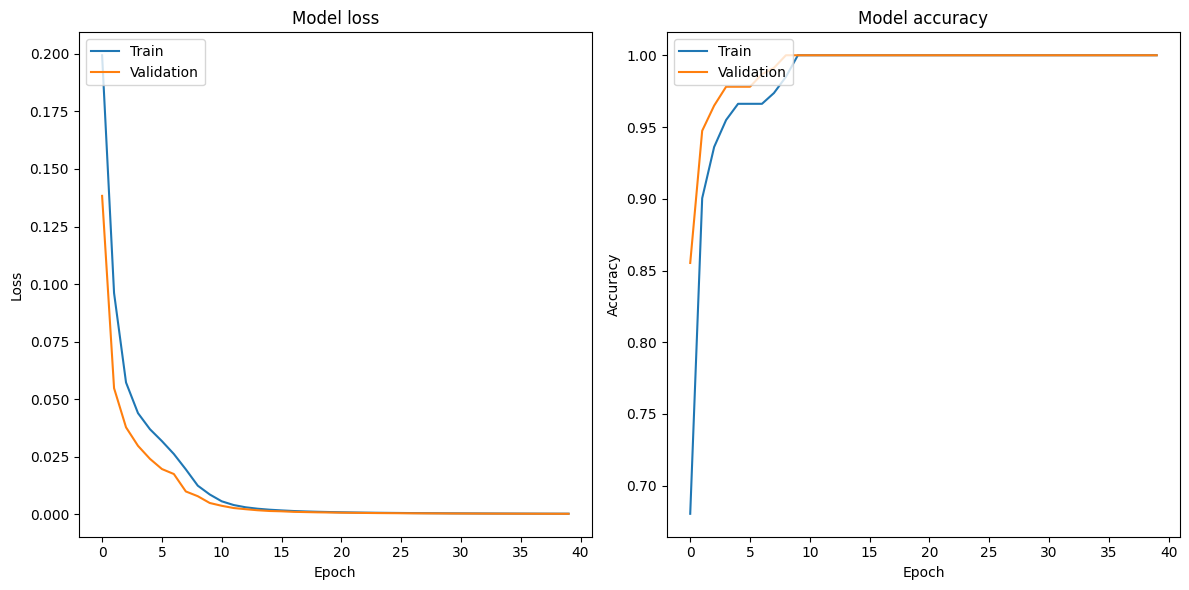

In [ ]:
# Create a figure with two subplots arranged in a single row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot training & validation loss values
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Model accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/24Winter/cs320-w24/cs320-final-project/models/snake2_possiblemvp_functional1.keras")

In [ ]:
model.evaluate(X_train, y_train)

17/17 [==============================] - 0s 2ms/step - loss: 2.3009e-04 - accuracy: 1.0000


[0.0002300910564372316, 1.0]

## Verifying model works on specific examples, looking at deeper stats on accuracy
Below are a couple spot-checks I did to make sure the model was perforning exactly how I thought it would

In [ ]:
# make the predictions binary instead of continuous
y_preds = model.predict(X_test)

y_preds[y_preds > 0.5] = 1
y_preds[y_preds <= 0.5] = 0

NameError: name 'model' is not defined

In [ ]:
# overall accuracy
y_test_reshape = y_test.reshape((y_test.shape[0], 1))

print("Overall Accuracy:")
len(y_preds[np.where(y_preds == y_test_reshape)])/len(y_preds)

Overall Accuracy:


1.0

In [ ]:
# accuracy where game_over == 1
# used to see if the model is biasing living or non-living examples
y_preds_gameover_subset = y_preds[X_test[:,3] == 1]
y_test_subset = y_test[X_test[:,3] == 1]
y_test_subset = y_test_subset.reshape((y_test_subset.shape[0], 1))

print("Accuracy of Moves that End Game:")
len(y_preds_gameover_subset[y_preds_gameover_subset == y_test_subset])/len(y_test_subset)

Accuracy of Moves that End Game:


1.0

In [ ]:
# here, we see that the model is accurately predicting a move to avoid and obstacle! yay!

obs = [0,0,1]
direction = -1
input = np.concatenate([obs, [direction]]).reshape((1,4))

print(input)


model.predict(input)

[[ 0  0  1 -1]]
1/1 [==============================] - 0s 30ms/step


array([[0.00061874]], dtype=float32)

## The model in action
Want to see the model in action? Just run the play_snake_game_with_model_1.py file in the command line using `python play_snake_game_with_model_1.py `. Not that this will not work in Colab, it must be run locally to see the graphics.